In [1]:
import matplotlib.pyplot as plt
import itertools
import random
import copy

#### A. Create a class called **Schelling**, with attributes width (how many houses there are on the horizontal axis), height (how many houses on the vertical axis), empty_ratio (number of empty locations), similarity_threshold (the percentage of neighbours that you want to have in your neighbourhood), n_iterations (how many iterations of the Schelling process we do), races (number of races). (Note: we will add other attributes along the way).

In [111]:
class Schelling:
    
    
    def __init__(self,width,height,empty_ratio,similarity_threshold,n_iterations,races):
        self.width = width
        self.height = height
        self.empty_ratio = empty_ratio
        self.similarity_threshold = similarity_threshold
        self.n_iterations = n_iterations
        self.races = races
        
    def populate(self):
        self.empty_houses = []
        self.agents = {}
        self.all_houses = list(itertools.product(list(range(0,self.width)),list(range(0,self.height))))
        random.shuffle(self.all_houses)
        self.n_empty = int(self.width*self.height*self.empty_ratio)
        self.empty_houses = self.all_houses[-self.n_empty:]
        self.remaining_houses = self.all_houses[:-self.n_empty]
            
        for i in self.remaining_houses:
            self.agents[i] = random.randint(1,self.races)
        
    def plot_city(self):
        colour = {1:'r',2:'b',3:'g'}
        counter = 1
        fig, ax = plt.subplots()
        for key,value in self.agents.items():
            ax.scatter(key[0]+0.5,key[1]+0.5, marker = 's',s=500,c=colour[value])
        plt.subplots_adjust(wspace=0)
        plt.grid()
        plt.xticks(list(range(self.width)))
        plt.yticks(list(range(self.height)))
        plt.show()
        
    def is_unsatisfied(self,agent):
        neighbours = []
        for x in [-1,0,1]:
            for y in [-1,0,1]:
                if agent[0]+x >= 0 and agent[0]+x < self.width and agent[1]+y >= 0 and agent[1]+y < self.height:
                    neighbour = ((agent[0]+x, agent[1]+y))
                    neighbours.append(neighbour)
        neighbours.remove(agent)
        race = self.agents[agent]
        similarity_counter = 0
        for n in neighbours:
            if  race == self.agents.get(n,0):
                similarity_counter += 1
        similarity_ratio = similarity_counter/ len(neighbours)
        if similarity_ratio < self.similarity_threshold:
            return False
        else:
            return True 

        
        
        
            

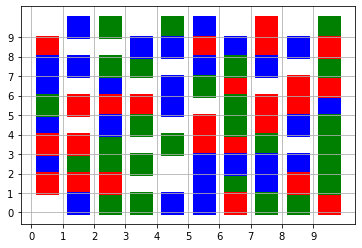

False

In [112]:
city = Schelling(10,10,0.2,0.3,100,3)
city.populate()
city.plot_city()
city.is_unsatisfied((5,3))

#### B. Write a method called **populate** which can be used to create an initial distribution of people in the grid.

To do this, we will try to design the method as follows:

1. the method creates new attributes: ```self.empty_houses``` as an empty list, ```self.agents``` as an empty dictionary. 
2. the method creates a new attribute ```self.all_houses``` as a list of all houses (hint: use ```itertools```, see suggestions below)
3. the method randomizes the allocation of houses (hint: use ```random.shuffle()``` for this task, see below)
4. the method creates a new attribute ```self.n_empty``` which is derived as the number of the empty houses (this is calculated by using the ```self.empty_ratio``` and the number of houses in the city )
5. the method sets the empty_houses to be the last ```self.n_empty``` houses
6. the remaining houses are assigned to ```self.remaining_houses```
7. we use ```self.remainging_houses``` to assign races to each house, creating a variable called ```houses_by_races```
8. we fill the dictionary ```self.agents``` with the ```house_by_race``` in which each agent lives (hint: use ```zip``` and the ```update``` method for dictionaries.


#### C. Write a method called **plot_city** which plots the city with all the empty and occupied houses with the right colours. 

The method ```plot_city``` sets up the parameters for the graph, and spits out fig and ax objects (matplotlib). Notice that we need to set xticks and yticks of the grid, and the grid itself (check [matplotlib](https://matplotlib.org/) documentation for details). The grid should have the dimension indicated by width and height attributes. Consider a scatter plot with square markers (also important to determine the right size for them)

Use this method to plot an instance of the class. 

#### D. Write a method called **is_unsatisfied** which evaluates if a specific cell in the grid is satisfied with the location or not. 

This method should check if an agent in a cell is unsatisfied with the neighbours it has or not. This task can be done in several ways, but here is a suggestion:

1. create a method which takes the coordinates of the house as arguments (on top of the object instance). 
2. the method builds a set of neighbours using this picture as reference: 

<img src="CA-Moore.png" alt="alt text" width="200"/>

3. the method then checks if each of these neighbours is of the same race or not, and counts how many neighbours are of the same race, and how many aren't. 
4. The method returns ```True``` if the ratio of same race neighbours to total is less than the similarity threshold, ```False``` otherwise. 

#### E. Write a method called **update** which checks each cell in the grid, verifies if it is satisfied or not, and if not it moves it to a random empty cell. 

This method checks if each agent is unsatisfied, and in that case, it fills a randomly chosen empty house with it. 
Important: remember to remove the location of the emptied house from ```self.agents``` and add it to ```self.empty_houses```!

#### F. Create a method that calculates an index of similarity 

To calculate this index:
1. calculate for each agent the ratio between the neighbours of the same race to the neighbours from a different race. 
2. sum up, and divide by the number of agents. 

#### G. Use this class to generate some experiments, by playing with the parameters (size of the city, similarity threshold, number of races, etc.) 

Make several experiments to analyse how the results change when we change one parameter at the time. 